In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
CSV_WEATHER_FILE = '../../datasources/weather/06344.csv'
CSV_AQI_ENRICH_FILE = '../../datasources/aqi_enrich/aqi_all_enrich.csv'

WEATHER_USE_COLUMNS = ['tavg', 'tmin', 'tmax', 'prcp', 'wdir', 'wspd', 'wpgt', 'pres']
AQI_USE_COLUMNS = ['AQI_O3', 'AQI_PM25', 'AQI_PM10', 'AQI_NO2', 'AQI']
CONC_MEAN_USE_COLUMNS = ['C_mean_O3', 'C_mean_PM25', 'C_mean_PM10', 'C_mean_NO2']
CONC_MAX_USE_COLUMNS = ['C_max_O3', 'C_max_PM25', 'C_max_PM10',  'C_max_NO2']
POL_CODES = [7, 6001, 5, 8]
POL_NAMES = {7: "O3", 6001: "PM25", 5: "PM10", 8: "NO2"}

In [3]:
df_enr = pd.read_csv(CSV_AQI_ENRICH_FILE, parse_dates=True, index_col='DatetimeEnd')
df_enr['is_new_year'] = [(df_enr['month'] == 1) & (df_enr['day'] == 1)][0] * 1
df_enr.shape

(2965, 2105)

In [7]:
df_weather = pd.read_csv(CSV_WEATHER_FILE, index_col='date', parse_dates=True)
df_weather = df_weather[WEATHER_USE_COLUMNS]
df_weather.shape

(2978, 8)

In [ ]:
df_joint = df_enr.merge(df_weather, how='left', left_index=True, right_index=True)

Text(0.5, 1.0, 'AQI / Weather')

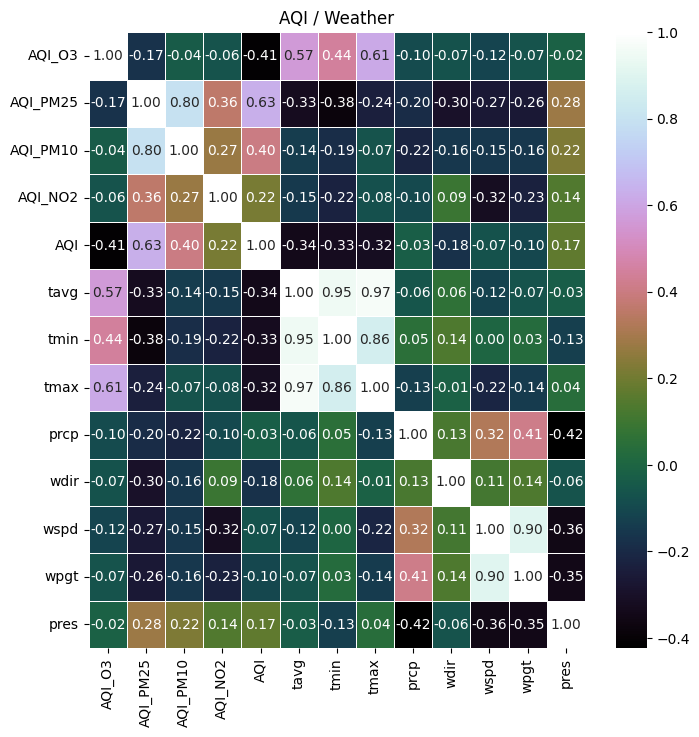

In [25]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_joint[AQI_USE_COLUMNS + WEATHER_USE_COLUMNS].corr(), annot=True, fmt=".2f", cmap='cubehelix', linewidths=.5, ax=ax)
ax.set_title('AQI / Weather')

Text(0.5, 1.0, 'Concentration mean / Weather')

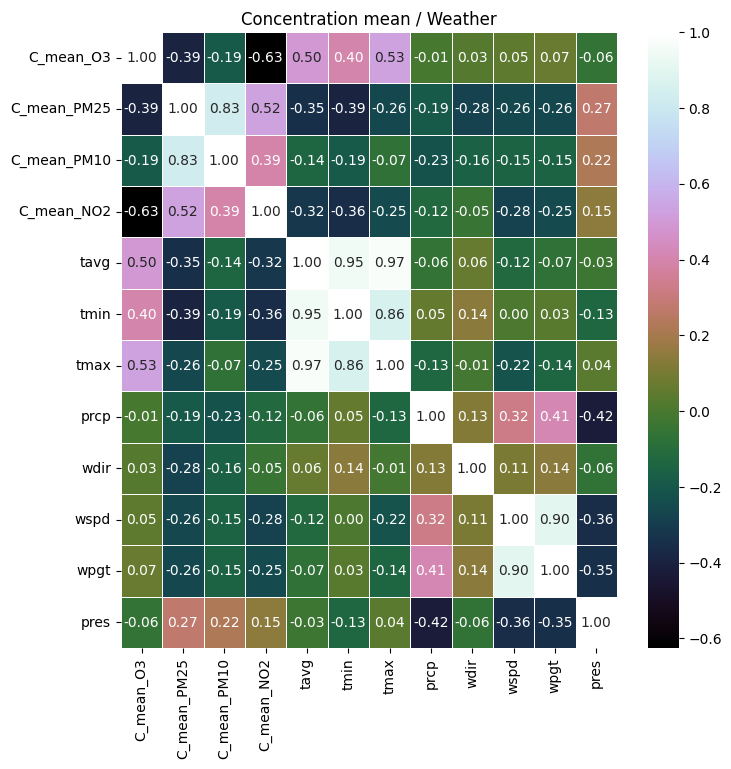

In [27]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_joint[CONC_MEAN_USE_COLUMNS + WEATHER_USE_COLUMNS].corr(), annot=True, fmt=".2f", cmap='cubehelix', linewidths=.5, ax=ax)
ax.set_title('Concentration mean / Weather')

Text(0.5, 1.0, 'Concentration max / Weather')

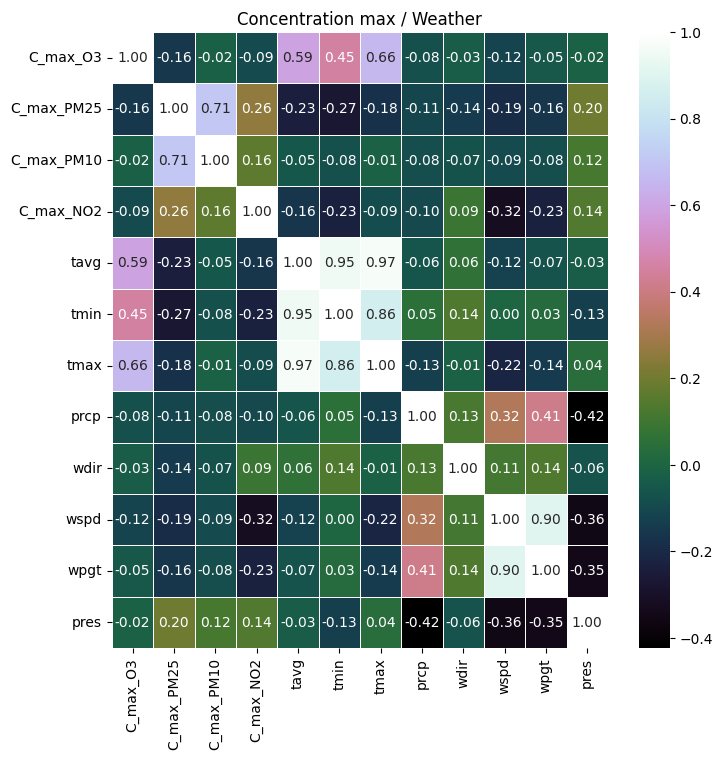

In [28]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df_joint[CONC_MAX_USE_COLUMNS + WEATHER_USE_COLUMNS].corr(), annot=True, fmt=".2f", cmap='cubehelix', linewidths=.5, ax=ax)
ax.set_title('Concentration max / Weather')

<Axes: ylabel='Density'>

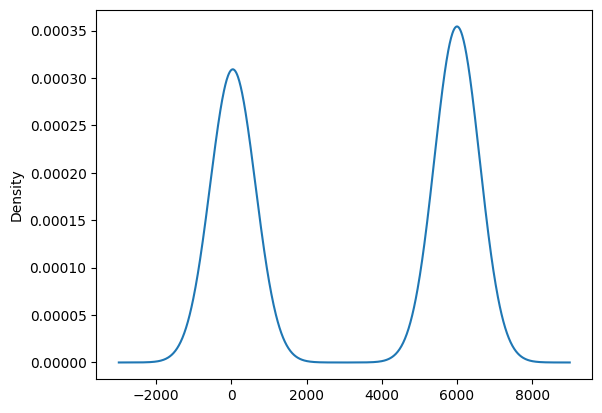

In [32]:
df_joint['AQI'].plot.kde()